# Model Selection Workflow for Classification

There are several steps inside a machine learning / data science workflow:
1. Question or problem definition
2. Read / acquire training and test data
3. Wrangle, prepare, cleanse the data
4. Analyze, identify patterns, and explore the data
5. Model, predict, and solve the problem
6. Visualize, report, and present final solution
7. Submit results

These steps are part of the workflow to solve these common data science goals:

**Classifying.** We may want to classify or categorize our samples. We may also want to understand the implications or correlation of different classes with our solution goal.

**Correlating.** One can approach the problem based on available features within the training dataset. Which features within the dataset contribute significantly to our solution goal? Statistically speaking is there a correlation among a feature and solution goal? As the feature values change does the solution state change as well, and visa-versa? This can be tested both for numerical and categorical features in the given dataset. We may also want to determine correlation among features other than survival for subsequent goals and workflow stages. Correlating certain features may help in creating, completing, or correcting features.

**Converting.** For modeling stage, one needs to prepare the data. Depending on the choice of model algorithm one may require all features to be converted to numerical equivalent values. So for instance converting text categorical values to numeric values.

**Completing.** Data preparation may also require us to estimate any missing values within a feature. Model algorithms may work best when there are no missing values.

**Correcting.** We may also analyze the given training dataset for errors or possibly innacurate values within features and try to corrent these values or exclude the samples containing the errors. One way to do this is to detect any outliers among our samples or features. We may also completely discard a feature if it is not contribting to the analysis or may significantly skew the results.

**Creating.** Can we create new features based on an existing feature or a set of features, such that the new feature follows the correlation, conversion, completeness goals.

**Charting.** How to select the right visualization plots and charts depending on nature of the data and the solution goals.

Source: https://www.kaggle.com/code/startupsci/titanic-data-science-solutions

### Question and problem definition

Ini this notebook, we are analyzing the Breast Cancer (Original) dataset from the UCI Machine Learning database (https://archive-beta.ics.uci.edu/dataset/15/breast+cancer+wisconsin+original). The problem statement is:

*Given a set of 9 physical features from clinical cases of breast cancer, predict whether a patient's cancer is benign or malignant.*

Some of the key findings from the dataset include:

- The dataset contains 699 data points of individuals with cancer
- Atrributes for each feature are below. Features seem to have been scaled to integers between 1 - 10:
    1. Sample code number: id number
    2. Clump Thickness: 1 - 10
    3. Uniformity of Cell Size: 1 - 10
    4. Uniformity of Cell Shape: 1 - 10
    5. Marginal Adhesion: 1 - 10
    6. Single Epithelial Cell Size: 1 - 10
    7. Bare Nuclei: 1 - 10
    8. Bland Chromatin: 1 - 10
    9. Normal Nucleoli: 1 - 10
    10. Mitoses: 1 - 10
    11. Class: (2 for benign, 4 for malignant)


#### Import required python libraries

In [88]:
# Import data analysis and wrangling libraries
import pandas as pd
import numpy as np
import random as rnd

# Import visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Import machine learning libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

# import sklearn libraries
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


### Acquire & describe the data

In [3]:
# import data
df = pd.read_csv('datasets/cancer_original.csv')
df.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [5]:
df.tail()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
678,776715,3,1,1,1,3,2,1,1,1,2
679,841769,2,1,1,1,2,1,1,1,1,2
680,888820,5,10,10,3,7,3,8,10,2,4
681,897471,4,8,6,4,3,4,10,6,1,4
682,897471,4,8,8,5,4,5,10,4,1,4


In [4]:
# print the column names
print(df.columns)

Index(['Sample code number', 'Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses', 'Class'],
      dtype='object')


In [8]:
# describe the data
df.describe()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,6.830000e+02,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,1.076720e+06,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,6.206440e+05,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,6.337500e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.776170e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171795e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238705e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [14]:
# count class distribution
B, M = df['Class'].value_counts()

# Print the class distribution value & percentage
print('Benign: {} ({:.2f}%)'.format(B,(B / (B + M)) * 100))
print('Malignant: {} ({:.2f}%)'.format(M, (M / (B + M)) * 100))

Benign: 444 (65.01%)
Malignant: 239 (34.99%)


**Categorical vs Numerical features**

In this dataset, all of the features are numerical and have been preprocessed to have values between 1 - 10. What 1 - 10 mean is left to the interpretation of the dataset owners (the doctor involved in the study). Some insights we can gain from a brief look into the data description:
- Because all data points are numerical, there is no need to handle categorical features.
- There are 683 data points (patients)
- Class is categorical with value 2 (benign) and 4 (malignant)
- There are 444 (65.01%) benign cases and 239 (34.99%) malignant cases. We may want to use stratification when creating our training & test sets

In [6]:
# check for missing values
df.isnull().sum()

Sample code number             0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [7]:
# check dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Sample code number           683 non-null    int64
 1   Clump Thickness              683 non-null    int64
 2   Uniformity of Cell Size      683 non-null    int64
 3   Uniformity of Cell Shape     683 non-null    int64
 4   Marginal Adhesion            683 non-null    int64
 5   Single Epithelial Cell Size  683 non-null    int64
 6   Bare Nuclei                  683 non-null    int64
 7   Bland Chromatin              683 non-null    int64
 8   Normal Nucleoli              683 non-null    int64
 9   Mitoses                      683 non-null    int64
 10  Class                        683 non-null    int64
dtypes: int64(11)
memory usage: 58.8 KB


**Missing values / errors, mixed data types**

There is no missing data points and there are no mixed data types as all features are integers. One thing to note is that, in this dataset, the sample code number will not be useful to the classification process as we do not have additional information on what these sample number may infer. However, this is not always true in other cases, as sample numbers or ids may refer to different conditions the samples were taken in.

In [24]:
# separate the data into dependent and independent variables
X = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

# preview the independent variables
X.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1


### Analyze data through visualization

One of the most common things we do before we train a model is to determine if features are correlated with each other. This is important because if features are correlated, we may not need to include both features in our model. This is because the model will be able to learn the correlation between the features and we will not be adding any additional information to the model by including both features.

Another importan things is to observe the correlation between each feature and the target variable. This is important because we want to make sure that the features we choose to include in our model are correlated with the target variable. If a feature is not correlated with the target variable, it will not be useful in predicting the target variable.

#### Correlation between features

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Clump Thickness'),
  Text(1, 0, 'Uniformity of Cell Size'),
  Text(2, 0, 'Uniformity of Cell Shape'),
  Text(3, 0, 'Marginal Adhesion'),
  Text(4, 0, 'Single Epithelial Cell Size'),
  Text(5, 0, 'Bare Nuclei'),
  Text(6, 0, 'Bland Chromatin'),
  Text(7, 0, 'Normal Nucleoli'),
  Text(8, 0, 'Mitoses')])

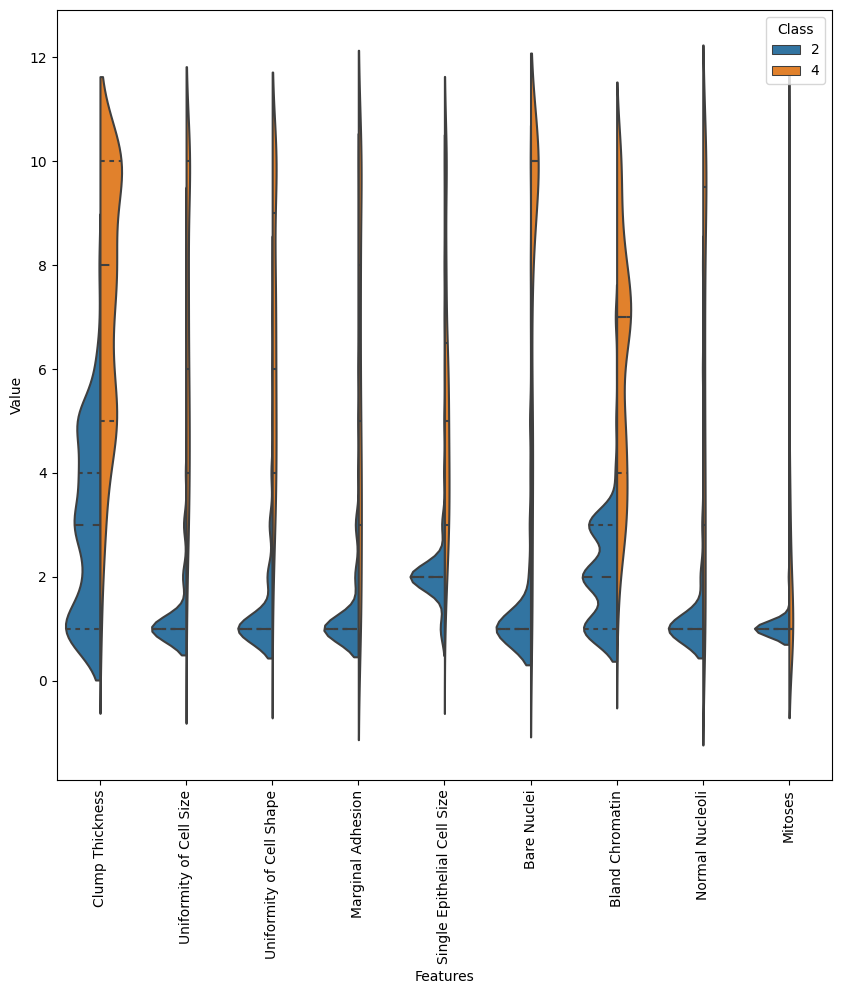

In [30]:
# visualize all the features using violin plot
data_vis = pd.concat([X, y], axis=1)
data_vis = pd.melt(data_vis, id_vars="Class", var_name="Features", value_name='Value')

# plot with violin plot
plt.figure(figsize=(10,10))
sns.violinplot(x="Features", y="Value", hue="Class", data=data_vis, split=True, inner="quart")
plt.xticks(rotation=90)


<AxesSubplot:>

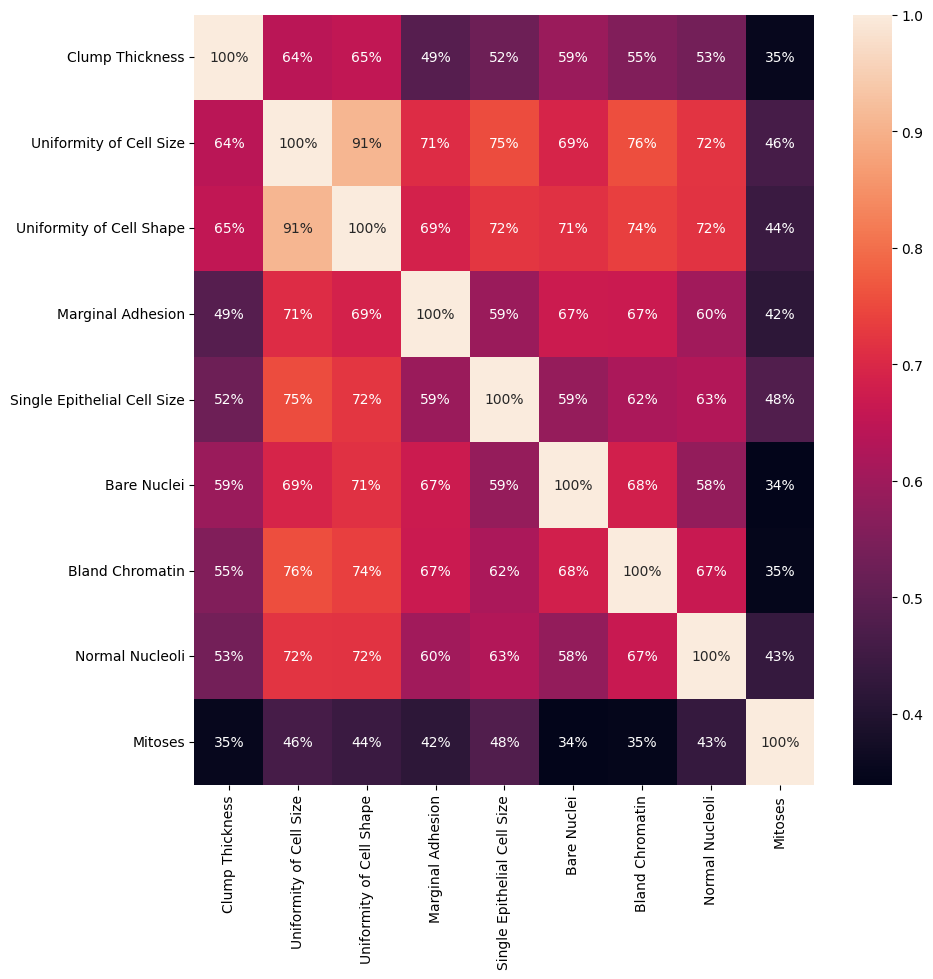

In [31]:
# visualize heatmap
plt.figure(figsize=(10,10))
sns.heatmap(X.corr(), annot=True, fmt='.0%')

From the visualizations above, it seems that uniformity of cell size & shape are highly correlated with each other. It may be possible to remove one of these features.

#### Correlation between feature and target variable

<Figure size 1000x1000 with 0 Axes>

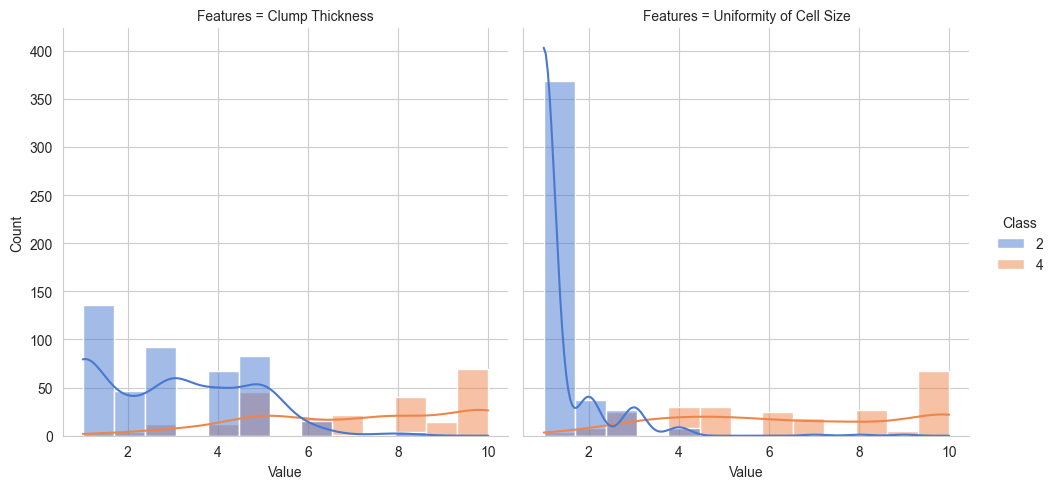

<Figure size 1000x1000 with 0 Axes>

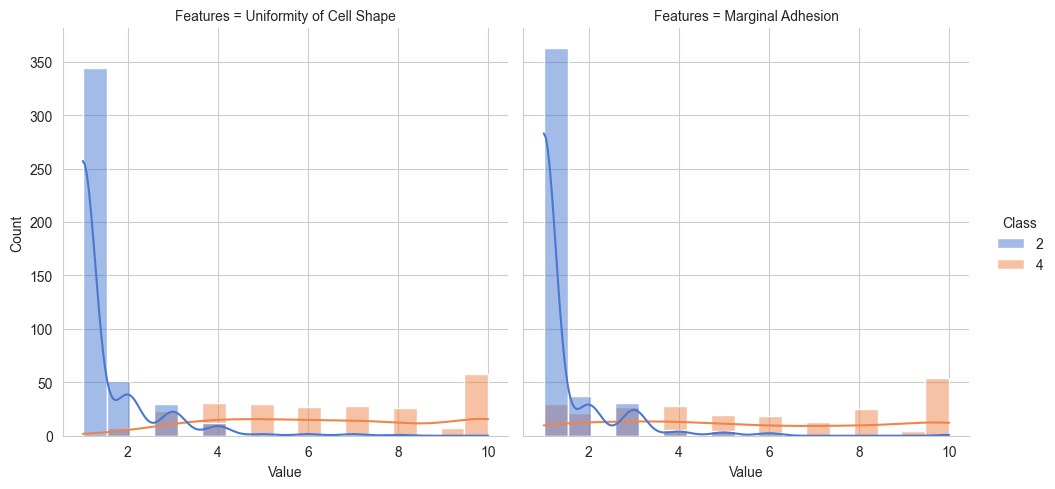

<Figure size 1000x1000 with 0 Axes>

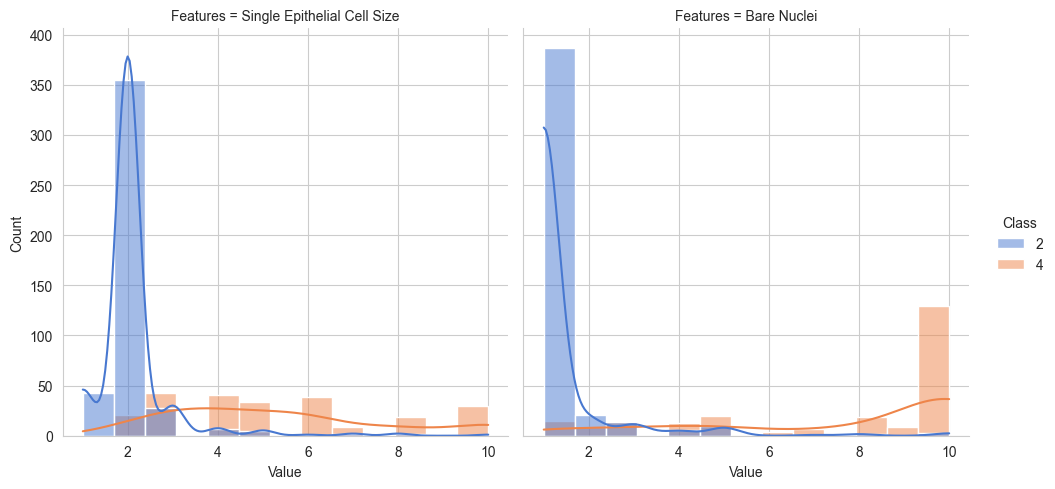

<Figure size 1000x1000 with 0 Axes>

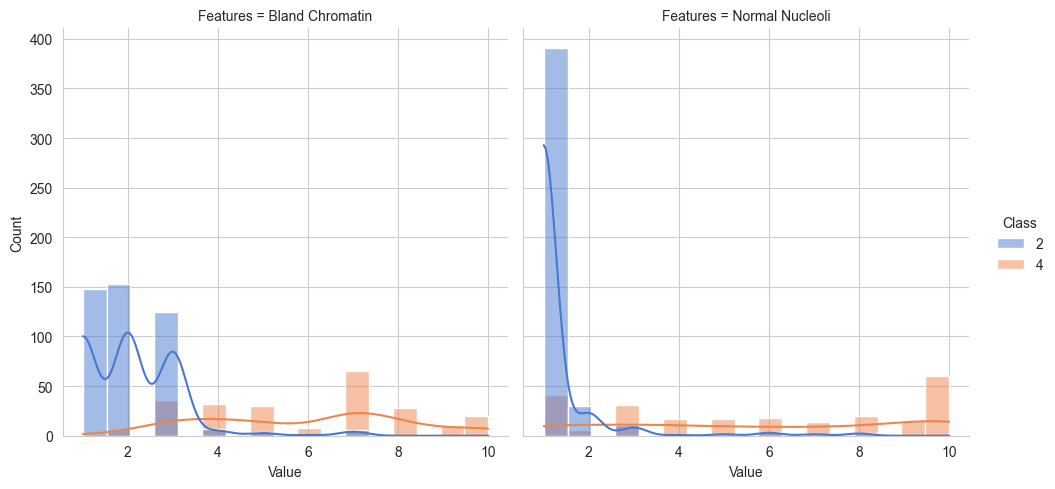

<Figure size 1000x1000 with 0 Axes>

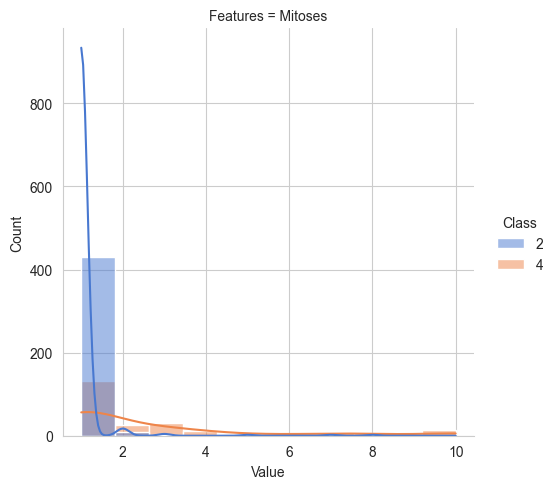

In [85]:
palette = sns.color_palette("muted", 2)

# visualize all the features using displot for first 2 features
data_vis = pd.concat([X.iloc[:, 0:2], y], axis=1)
data_vis = pd.melt(data_vis, id_vars="Class", var_name="Features", value_name='Value')
plt.figure(figsize=(10,10))
sns.displot(data_vis, x="Value", col="Features", hue="Class", kde=True, palette=palette)

# visualize all the features using displot for next 2 features
data_vis = pd.concat([X.iloc[:, 2:4], y], axis=1)
data_vis = pd.melt(data_vis, id_vars="Class", var_name="Features", value_name='Value')
plt.figure(figsize=(10,10))
sns.displot(data_vis, x="Value", col="Features", hue="Class", kde=True, palette=palette)

# visualize all the features using displot for next 2 features
data_vis = pd.concat([X.iloc[:, 4:6], y], axis=1)
data_vis = pd.melt(data_vis, id_vars="Class", var_name="Features", value_name='Value')
plt.figure(figsize=(10,10))
sns.displot(data_vis, x="Value", col="Features", hue="Class", kde=True, palette=palette)

# visualize all the features using displot for next 2 features
data_vis = pd.concat([X.iloc[:, 6:8], y], axis=1)
data_vis = pd.melt(data_vis, id_vars="Class", var_name="Features", value_name='Value')
plt.figure(figsize=(10,10))
sns.displot(data_vis, x="Value", col="Features", hue="Class", kde=True, palette=palette)

# visualize all the features using displot for next 2 features
data_vis = pd.concat([X.iloc[:, 8:9], y], axis=1)
data_vis = pd.melt(data_vis, id_vars="Class", var_name="Features", value_name='Value')
plt.figure(figsize=(10,10))
sns.displot(data_vis, x="Value", col="Features", hue="Class", kde=True, palette=palette)


From the visualizations above, it seems that for the benign cases, values are more compact towards the lower end of the scale. For the malignant cases, values are more spread out across the scale. This is a good indication that the features are distinguishing between the two classes.

### Model, predict and solve

For classification, there are several possible models we can use. We will use the following models and test for the best performing model:
- Logistic Regression
- K-Nearest Neighbors
- Support Vector Machines
- Naive Bayes classifier
- Decision Tree
- Random Forest
- Stochastic Gradient Descent

#### Model creation and training

LR: 0.963401 (0.030689)
KNN: 0.974411 (0.024774)
CART: 0.950471 (0.030842)
NB: 0.965185 (0.026633)
SVM: 0.959731 (0.024439)
SGD: 0.952559 (0.033797)
RFC: 0.972525 (0.025152)


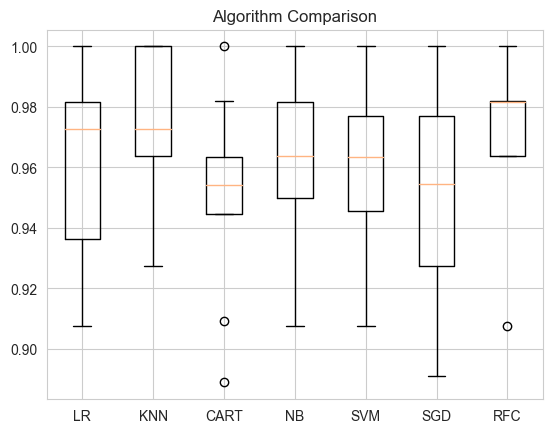

In [92]:
# create training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# create a list of models
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto', kernel='rbf')))
models.append(('SGD', SGDClassifier(max_iter=1000, tol=1e-3)))
models.append(('RFC', RandomForestClassifier(n_estimators=100, random_state=0)))

# evaluate each model in turn
results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=0, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

# compare algorithms
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

In [93]:
# train each type of model
LR = LogisticRegression(solver='liblinear', multi_class='ovr')
LR.fit(X_train, y_train)

KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)

CART = DecisionTreeClassifier()
CART.fit(X_train, y_train)

NB = GaussianNB()
NB.fit(X_train, y_train)

SVM = SVC(gamma='auto', kernel='rbf')
SVM.fit(X_train, y_train)

SGD = SGDClassifier(max_iter=1000, tol=1e-3)
SGD.fit(X_train, y_train)

RFC = RandomForestClassifier(n_estimators=100, random_state=0)
RFC.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [95]:
# predict the test set results for each model
y_pred_LR = LR.predict(X_test)
y_pred_KNN = KNN.predict(X_test)
y_pred_CART = CART.predict(X_test)
y_pred_NB = NB.predict(X_test)
y_pred_SVM = SVM.predict(X_test)
y_pred_SGD = SGD.predict(X_test)
y_pred_RFC = RFC.predict(X_test)

# evaluate the accuracy of each model
accuracy_LR = accuracy_score(y_test, y_pred_LR)
accuracy_KNN = accuracy_score(y_test, y_pred_KNN)
accuracy_CART = accuracy_score(y_test, y_pred_CART)
accuracy_NB = accuracy_score(y_test, y_pred_NB)
accuracy_SVM = accuracy_score(y_test, y_pred_SVM)
accuracy_SGD = accuracy_score(y_test, y_pred_SGD)
accuracy_RFC = accuracy_score(y_test, y_pred_RFC)

# print the accuracy of each model rounded to 2 decimal places in percentage
print('Accuracy of Logistic Regression: {:.2f}%'.format(accuracy_LR*100))
print('Accuracy of K Nearest Neighbors: {:.2f}%'.format(accuracy_KNN*100))
print('Accuracy of Decision Tree: {:.2f}%'.format(accuracy_CART*100))
print('Accuracy of Naive Bayes: {:.2f}%'.format(accuracy_NB*100))
print('Accuracy of Support Vector Machine: {:.2f}%'.format(accuracy_SVM*100))
print('Accuracy of Stochastic Gradient Descent: {:.2f}%'.format(accuracy_SGD*100))
print('Accuracy of Random Forest: {:.2f}%'.format(accuracy_RFC*100))



Accuracy of Logistic Regression: 94.89%
Accuracy of K Nearest Neighbors: 97.08%
Accuracy of Decision Tree: 93.43%
Accuracy of Naive Bayes: 94.89%
Accuracy of Support Vector Machine: 95.62%
Accuracy of Stochastic Gradient Descent: 95.62%
Accuracy of Random Forest: 97.08%


#### Model Evaluation

In [96]:
# create a dataframe to store the accuracy of each model
model_accuracy = pd.DataFrame({
    'Model': ['Logistic Regression', 'K Nearest Neighbors', 'Decision Tree', 
                'Naive Bayes', 'Support Vector Machine', 'Stochastic Gradient Descent', 
                'Random Forest'],
    'Accuracy': [accuracy_LR, accuracy_KNN, accuracy_CART, accuracy_NB,
                accuracy_SVM, accuracy_SGD, accuracy_RFC]})
model_accuracy.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
1,K Nearest Neighbors,0.970803
6,Random Forest,0.970803
4,Support Vector Machine,0.956204
5,Stochastic Gradient Descent,0.956204
0,Logistic Regression,0.948905
3,Naive Bayes,0.948905
2,Decision Tree,0.934307


Here KNN and Random Forest have the same accuracy score. However, KNN is a simpler model and is easier to interpret. As the dataset here is considered a small dataset, we will choose KNN as our final model. In the case of a larger dataset, we may want to choose Random Forest as our final model. Some reasons for this are:
- Random Forest can be more accurate and powerful in larger and more complex datasets
- KNN tends to be slower to train than Random Forest in larger datasets
- KNN is generally more sensitive to hyperparameter tuning than Random Forest, which can be more crucial in larger datasets

